#installing pip3 install sklearn --user

uses of KNN:- when data is less, prefer using KNN
hackathon

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #importing function make_blobs , it is like a data generator
import pandas as pd

In [59]:
plt.style.use('seaborn')

In [60]:
X, y = make_blobs(n_samples=1000, n_features=2, center_box=(-2,2), centers=2, random_state=2)
# X contain x and y coord of points
# y contain its corresponding labels
#jitne bhi hum centers  denge utne hi labels assign ho jayenge classes ko
#number of feature means whether it will be a 2d array , 3d array , 4d etc
# n_samples indicate number of points, n_features means number of points require to identife that pnt uniquely eg x and y coord
# x contains x coord and y coord of resp points and y contains resp classes for the point

In [61]:
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 500]))

In [45]:
print(X.shape, y.shape) 

(1000, 2) (1000,)


In [46]:
y

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [47]:
#creating a query_point
q_point = np.array([0.0,-0.8]) #star mark jiske liye predict karna hai
#and we have to predict the class of this query point

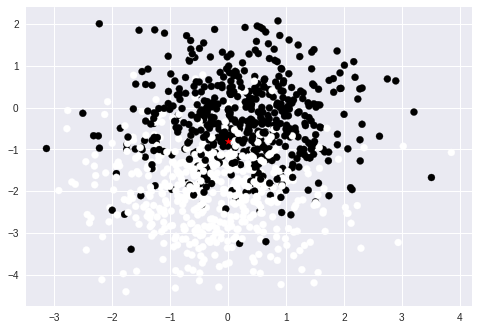

In [48]:
plt.scatter(X[:,0], X[:,1],c=y) #c=y create encoding for colors
plt.scatter(q_point[0], q_point[1],c='red',marker='*')
plt.show()

In [49]:
arr = [1,2,1,1,4,5]
np.unique(arr, return_counts=True) #returning the unique number and the count of each number

(array([1, 2, 4, 5]), array([3, 1, 1, 1]))

In [50]:
#defining our euclidian distance to calc distance of query point from all other points
def distance(a,b): #distance function having 2 vectors a and b
    return np.sqrt(np.sum(a-b)**2) #a and b are array of Xa Xb and Ya Yb x and y are coord of a and b

In [51]:
#defining KNN function
def KNN(X,y,q_point,k=5): #k is the number of neighbors
    
    m = X.shape[0] # x mai kitne points hai, or we can say the total number of points
    
    dis_l = [] #defining array which will store the distances
    
    for ix in range(m): #hover over all the points
        dis = distance(X[ix],q_point) #computing distance, distance of query point from point in the dataset
        
        dis_l.append([dis,y[ix]]) #we are going to append two things, distance and the label, so we are basically maintaing a list of tuples
        #distance dis is kept at the first place in the append function cz during sorting we will sort on the basis of first parameter
        
    dis_l = sorted(dis_l) #now sorting
    #picking nearest or the first k points
    dis_l = dis_l[:k] #first k ele utha liye, we will do the slicing and we discard points which are after k
    dis_l = np.array(dis_l) #converting into numpy array so that we can perform more operations
    
    print(dis_l)
    
    uniq = np.unique(dis_l[:,1], return_counts=True) #seeing unique values in the first col only where we store the labels
    print(uniq)
    out = np.argmax(uniq[1]) #this will give the maximum argument among the count of the classes
    
    return uniq[0][out] #this will return the class having the maximum count
    

In [52]:
KNN(X,y,q_point) #out of the 5 nearest points , 2 are 0 and 3 are 1, so by KNN the query point will belong to class 1

[[9.74259959e-04 0.00000000e+00]
 [6.73754815e-03 1.00000000e+00]
 [8.75375926e-03 1.00000000e+00]
 [1.12640698e-02 0.00000000e+00]
 [1.22145112e-02 1.00000000e+00]]
(array([0., 1.]), array([2, 3]))


1.0

In [53]:
#validation
def accuracy(X_train, y_train, X_val, y_val, k=5):
    y_pred = []
    for ix in X_val:
        
        pred = KNN(X_train, y_train, ix, k)
        y_pred.append(pred)
    score = np.sum(y_val==y_pred)/y_val.shape[0] #this function take y_val and y_pred and har ek point pr check krta hai ki value same hai ya nahi
    #total example kitne hai/sahi kitne hai
    return score

In [54]:
data = pd.read_csv("./fashion-mnist_test.csv")

X = data.values[:,1:]
y = data.values[:,0]

In [55]:
split = int(0.80*(X.shape[0]))

In [56]:
X_train = X[:split]
y_train = y[:split]

X_val = X[split:]
y_val = y[split:]

In [57]:
accuracy(X_train,y_train,X_val,y_val)

[[12.  8.]
 [16.  5.]
 [18.  5.]
 [45.  5.]
 [45.  5.]]
(array([5., 8.]), array([4, 1]))
[[ 7.  7.]
 [12.  7.]
 [17.  7.]
 [22.  7.]
 [27.  7.]]
(array([7.]), array([5]))
[[ 6.  5.]
 [ 8.  1.]
 [ 9.  1.]
 [ 9.  5.]
 [12.  9.]]
(array([1., 5., 9.]), array([2, 2, 1]))
[[ 3.  1.]
 [15.  1.]
 [22.  5.]
 [24.  1.]
 [25.  3.]]
(array([1., 3., 5.]), array([3, 1, 1]))
[[ 3.  2.]
 [10.  6.]
 [16.  0.]
 [16.  2.]
 [17.  7.]]
(array([0., 2., 6., 7.]), array([1, 2, 1, 1]))
[[ 3.  8.]
 [16.  8.]
 [19.  0.]
 [20.  8.]
 [20.  9.]]
(array([0., 8., 9.]), array([1, 3, 1]))
[[ 7.  7.]
 [11.  1.]
 [12.  2.]
 [16.  7.]
 [20.  2.]]
(array([1., 2., 7.]), array([1, 2, 2]))
[[ 0.  2.]
 [ 4.  2.]
 [ 6.  8.]
 [13.  6.]
 [27.  8.]]
(array([2., 6., 8.]), array([2, 1, 2]))
[[ 2.  3.]
 [ 2.  8.]
 [ 4.  1.]
 [11.  5.]
 [15.  3.]]
(array([1., 3., 5., 8.]), array([1, 2, 1, 1]))
[[ 0.  3.]
 [ 4.  9.]
 [15.  9.]
 [21.  2.]
 [24.  0.]]
(array([0., 2., 3., 9.]), array([1, 1, 1, 2]))
[[16.  5.]
 [33.  5.]
 [48.  5.]
 [50.  

[[ 1.  6.]
 [ 5.  1.]
 [ 9.  7.]
 [22.  3.]
 [23.  4.]]
(array([1., 3., 4., 6., 7.]), array([1, 1, 1, 1, 1]))
[[10.  1.]
 [11.  8.]
 [13.  2.]
 [16.  9.]
 [25.  3.]]
(array([1., 2., 3., 8., 9.]), array([1, 1, 1, 1, 1]))
[[ 1.  7.]
 [ 4.  7.]
 [ 6.  7.]
 [16.  7.]
 [18.  6.]]
(array([6., 7.]), array([1, 4]))
[[287.   2.]
 [380.   8.]
 [403.   8.]
 [486.   2.]
 [528.   8.]]
(array([2., 8.]), array([2, 3]))
[[ 10.   5.]
 [ 75.   5.]
 [ 82.   5.]
 [107.   5.]
 [167.   7.]]
(array([5., 7.]), array([4, 1]))
[[ 1.  7.]
 [10.  7.]
 [21.  1.]
 [23.  6.]
 [25.  7.]]
(array([1., 6., 7.]), array([1, 1, 3]))
[[ 7.  9.]
 [16.  4.]
 [24.  3.]
 [24.  9.]
 [32.  0.]]
(array([0., 3., 4., 9.]), array([1, 1, 1, 2]))
[[ 1.  2.]
 [ 1.  9.]
 [21.  6.]
 [29.  9.]
 [32.  4.]]
(array([2., 4., 6., 9.]), array([1, 1, 1, 2]))
[[ 3.  3.]
 [20.  7.]
 [24.  4.]
 [35.  9.]
 [40.  6.]]
(array([3., 4., 6., 7., 9.]), array([1, 1, 1, 1, 1]))
[[ 2.  4.]
 [39.  2.]
 [49.  6.]
 [54.  9.]
 [62.  1.]]
(array([1., 2., 4., 6., 9

[[ 8.  2.]
 [10.  6.]
 [13.  2.]
 [14.  2.]
 [37.  8.]]
(array([2., 6., 8.]), array([3, 1, 1]))
[[ 6.  3.]
 [ 9.  4.]
 [ 9.  4.]
 [ 9.  8.]
 [10.  9.]]
(array([3., 4., 8., 9.]), array([1, 2, 1, 1]))
[[ 1.  4.]
 [ 6.  2.]
 [12.  3.]
 [18.  0.]
 [19.  5.]]
(array([0., 2., 3., 4., 5.]), array([1, 1, 1, 1, 1]))
[[ 0.  4.]
 [32.  5.]
 [36.  5.]
 [36.  5.]
 [40.  7.]]
(array([4., 5., 7.]), array([1, 3, 1]))
[[ 1.  3.]
 [ 3.  0.]
 [ 5.  5.]
 [ 7.  0.]
 [19.  6.]]
(array([0., 3., 5., 6.]), array([2, 1, 1, 1]))
[[12.  8.]
 [21.  0.]
 [21.  2.]
 [22.  8.]
 [22.  8.]]
(array([0., 2., 8.]), array([1, 1, 3]))
[[12.  3.]
 [13.  6.]
 [15.  3.]
 [18.  1.]
 [19.  0.]]
(array([0., 1., 3., 6.]), array([1, 1, 2, 1]))
[[ 0.  1.]
 [20.  4.]
 [22.  3.]
 [24.  1.]
 [26.  9.]]
(array([1., 3., 4., 9.]), array([2, 1, 1, 1]))
[[ 5.  8.]
 [11.  7.]
 [20.  9.]
 [25.  2.]
 [27.  0.]]
(array([0., 2., 7., 8., 9.]), array([1, 1, 1, 1, 1]))
[[ 4.  0.]
 [ 6.  1.]
 [22.  3.]
 [31.  1.]
 [34.  3.]]
(array([0., 1., 3.]), ar

[[ 8.  1.]
 [ 9.  3.]
 [17.  5.]
 [22.  2.]
 [25.  9.]]
(array([1., 2., 3., 5., 9.]), array([1, 1, 1, 1, 1]))
[[ 4.  4.]
 [18.  0.]
 [20.  4.]
 [36.  8.]
 [49.  2.]]
(array([0., 2., 4., 8.]), array([1, 1, 2, 1]))
[[ 2.  9.]
 [10.  3.]
 [11.  0.]
 [16.  3.]
 [18.  7.]]
(array([0., 3., 7., 9.]), array([1, 2, 1, 1]))
[[ 3.  5.]
 [ 4.  1.]
 [12.  1.]
 [12.  3.]
 [16.  5.]]
(array([1., 3., 5.]), array([2, 1, 2]))
[[23.  6.]
 [25.  0.]
 [28.  6.]
 [29.  0.]
 [32.  8.]]
(array([0., 6., 8.]), array([2, 2, 1]))
[[10.  1.]
 [12.  5.]
 [13.  1.]
 [15.  3.]
 [26.  1.]]
(array([1., 3., 5.]), array([3, 1, 1]))
[[ 4.  7.]
 [ 5.  7.]
 [ 5.  8.]
 [12.  7.]
 [17.  1.]]
(array([1., 7., 8.]), array([1, 3, 1]))
[[ 0.  3.]
 [ 8.  7.]
 [10.  8.]
 [13.  6.]
 [15.  7.]]
(array([3., 6., 7., 8.]), array([1, 1, 2, 1]))
[[ 2.  9.]
 [11.  1.]
 [11.  1.]
 [19.  5.]
 [32.  6.]]
(array([1., 5., 6., 9.]), array([2, 1, 1, 1]))
[[ 2.  6.]
 [ 4.  3.]
 [ 5.  3.]
 [10.  8.]
 [16.  0.]]
(array([0., 3., 6., 8.]), array([1, 2,

[[15.  3.]
 [23.  9.]
 [31.  8.]
 [34.  9.]
 [41.  8.]]
(array([3., 8., 9.]), array([1, 2, 2]))
[[ 3.  3.]
 [ 7.  0.]
 [ 7.  1.]
 [ 7.  1.]
 [15.  6.]]
(array([0., 1., 3., 6.]), array([1, 2, 1, 1]))
[[ 5.  9.]
 [ 9.  5.]
 [ 9.  6.]
 [13.  5.]
 [17.  8.]]
(array([5., 6., 8., 9.]), array([2, 1, 1, 1]))
[[ 5.  7.]
 [ 5.  7.]
 [ 7.  9.]
 [10.  8.]
 [11.  2.]]
(array([2., 7., 8., 9.]), array([1, 2, 1, 1]))
[[19.  5.]
 [35.  7.]
 [43.  5.]
 [48.  5.]
 [51.  7.]]
(array([5., 7.]), array([3, 2]))
[[14.  8.]
 [31.  2.]
 [44.  4.]
 [68.  4.]
 [73.  6.]]
(array([2., 4., 6., 8.]), array([1, 2, 1, 1]))
[[11.  1.]
 [20.  1.]
 [23.  5.]
 [33.  7.]
 [35.  1.]]
(array([1., 5., 7.]), array([3, 1, 1]))
[[11.  6.]
 [14.  4.]
 [23.  4.]
 [26.  0.]
 [28.  9.]]
(array([0., 4., 6., 9.]), array([1, 2, 1, 1]))
[[ 2.  5.]
 [33.  8.]
 [36.  5.]
 [38.  5.]
 [47.  7.]]
(array([5., 7., 8.]), array([3, 1, 1]))
[[ 2.  3.]
 [ 5.  4.]
 [ 5.  9.]
 [10.  0.]
 [11.  1.]]
(array([0., 1., 3., 4., 9.]), array([1, 1, 1, 1, 1])

[[ 6.  5.]
 [ 8.  1.]
 [16.  3.]
 [26.  3.]
 [28.  3.]]
(array([1., 3., 5.]), array([1, 3, 1]))
[[ 4.  0.]
 [10.  1.]
 [10.  5.]
 [11.  3.]
 [21.  6.]]
(array([0., 1., 3., 5., 6.]), array([1, 1, 1, 1, 1]))
[[ 3.  3.]
 [ 5.  9.]
 [ 7.  8.]
 [15.  9.]
 [21.  7.]]
(array([3., 7., 8., 9.]), array([1, 1, 1, 2]))
[[ 2.  0.]
 [ 7.  3.]
 [ 8.  9.]
 [ 9.  9.]
 [13.  6.]]
(array([0., 3., 6., 9.]), array([1, 1, 1, 2]))
[[ 2.  5.]
 [29.  4.]
 [34.  3.]
 [35.  3.]
 [36.  7.]]
(array([3., 4., 5., 7.]), array([2, 1, 1, 1]))
[[ 4.  6.]
 [15.  4.]
 [19.  0.]
 [19.  3.]
 [29.  6.]]
(array([0., 3., 4., 6.]), array([1, 1, 1, 2]))
[[ 2.  3.]
 [ 4.  7.]
 [ 6.  3.]
 [ 9.  8.]
 [10.  6.]]
(array([3., 6., 7., 8.]), array([2, 1, 1, 1]))
[[24.  5.]
 [29.  2.]
 [59.  7.]
 [62.  5.]
 [80.  5.]]
(array([2., 5., 7.]), array([1, 3, 1]))
[[ 2.  6.]
 [ 4.  8.]
 [ 5.  3.]
 [ 5.  8.]
 [12.  4.]]
(array([3., 4., 6., 8.]), array([1, 1, 1, 2]))
[[ 3.  6.]
 [ 8.  0.]
 [13.  3.]
 [21.  4.]
 [27.  0.]]
(array([0., 3., 4., 6.])

[[ 0.  9.]
 [ 4.  2.]
 [10.  1.]
 [10.  2.]
 [12.  8.]]
(array([1., 2., 8., 9.]), array([1, 2, 1, 1]))
[[17.  6.]
 [17.  6.]
 [27.  8.]
 [32.  2.]
 [33.  2.]]
(array([2., 6., 8.]), array([2, 2, 1]))
[[ 0.  1.]
 [ 0.  7.]
 [ 5.  1.]
 [ 6.  7.]
 [11.  7.]]
(array([1., 7.]), array([2, 3]))
[[  2.   0.]
 [ 22.   6.]
 [ 64.   8.]
 [ 81.   4.]
 [106.   2.]]
(array([0., 2., 4., 6., 8.]), array([1, 1, 1, 1, 1]))
[[ 3.  7.]
 [26.  7.]
 [27.  7.]
 [28.  2.]
 [34.  5.]]
(array([2., 5., 7.]), array([1, 1, 3]))
[[ 1.  4.]
 [ 6.  9.]
 [ 8.  7.]
 [11.  3.]
 [12.  0.]]
(array([0., 3., 4., 7., 9.]), array([1, 1, 1, 1, 1]))
[[ 3.  5.]
 [11.  1.]
 [13.  3.]
 [25.  3.]
 [26.  7.]]
(array([1., 3., 5., 7.]), array([1, 2, 1, 1]))
[[14.  1.]
 [24.  3.]
 [30.  6.]
 [37.  3.]
 [39.  8.]]
(array([1., 3., 6., 8.]), array([1, 2, 1, 1]))
[[ 1.  7.]
 [ 2.  2.]
 [ 7.  5.]
 [14.  1.]
 [15.  0.]]
(array([0., 1., 2., 5., 7.]), array([1, 1, 1, 1, 1]))
[[2. 1.]
 [5. 3.]
 [5. 8.]
 [6. 1.]
 [7. 1.]]
(array([1., 3., 8.]), ar

[[ 4.  4.]
 [ 9.  7.]
 [11.  1.]
 [13.  7.]
 [29.  4.]]
(array([1., 4., 7.]), array([1, 2, 2]))
[[ 5.  0.]
 [ 8.  0.]
 [14.  6.]
 [15.  7.]
 [15.  7.]]
(array([0., 6., 7.]), array([2, 1, 2]))
[[ 0.  3.]
 [ 4.  3.]
 [ 6.  8.]
 [ 8.  3.]
 [16.  9.]]
(array([3., 8., 9.]), array([3, 1, 1]))
[[ 3.  1.]
 [12.  2.]
 [22.  0.]
 [24.  7.]
 [38.  3.]]
(array([0., 1., 2., 3., 7.]), array([1, 1, 1, 1, 1]))
[[ 3.  9.]
 [ 6.  9.]
 [ 8.  4.]
 [41.  4.]
 [53.  2.]]
(array([2., 4., 9.]), array([1, 2, 2]))
[[ 3.  4.]
 [ 4.  2.]
 [ 4.  9.]
 [ 7.  6.]
 [10.  3.]]
(array([2., 3., 4., 6., 9.]), array([1, 1, 1, 1, 1]))
[[ 2.  0.]
 [11.  0.]
 [22.  2.]
 [27.  2.]
 [32.  4.]]
(array([0., 2., 4.]), array([2, 2, 1]))
[[12.  2.]
 [22.  4.]
 [24.  2.]
 [27.  9.]
 [30.  8.]]
(array([2., 4., 8., 9.]), array([2, 1, 1, 1]))
[[ 1.  4.]
 [ 5.  2.]
 [ 5.  8.]
 [14.  9.]
 [17.  4.]]
(array([2., 4., 8., 9.]), array([1, 2, 1, 1]))
[[ 3.  2.]
 [14.  1.]
 [17.  6.]
 [22.  1.]
 [28.  5.]]
(array([1., 2., 5., 6.]), array([2, 1,

[[ 1.  1.]
 [ 3.  1.]
 [19.  0.]
 [20.  7.]
 [24.  1.]]
(array([0., 1., 7.]), array([1, 3, 1]))
[[ 6.  5.]
 [ 7.  7.]
 [ 8.  9.]
 [24.  3.]
 [24.  5.]]
(array([3., 5., 7., 9.]), array([1, 2, 1, 1]))
[[15.  1.]
 [21.  8.]
 [33.  2.]
 [33.  8.]
 [36.  4.]]
(array([1., 2., 4., 8.]), array([1, 1, 1, 2]))
[[ 0.  4.]
 [ 9.  4.]
 [18.  4.]
 [21.  3.]
 [28.  6.]]
(array([3., 4., 6.]), array([1, 3, 1]))
[[ 3.  2.]
 [45.  2.]
 [50.  4.]
 [55.  8.]
 [58.  0.]]
(array([0., 2., 4., 8.]), array([1, 2, 1, 1]))
[[13.  9.]
 [22.  8.]
 [24.  2.]
 [30.  2.]
 [39.  4.]]
(array([2., 4., 8., 9.]), array([2, 1, 1, 1]))
[[ 2.  0.]
 [ 4.  0.]
 [11.  4.]
 [12.  0.]
 [21.  4.]]
(array([0., 4.]), array([3, 2]))
[[11.  2.]
 [18.  0.]
 [23.  9.]
 [26.  8.]
 [27.  6.]]
(array([0., 2., 6., 8., 9.]), array([1, 1, 1, 1, 1]))
[[ 1.  4.]
 [28.  6.]
 [44.  2.]
 [51.  6.]
 [52.  4.]]
(array([2., 4., 6.]), array([1, 2, 2]))
[[2.370e+02 8.000e+00]
 [2.580e+02 6.000e+00]
 [2.650e+02 8.000e+00]
 [2.347e+03 8.000e+00]
 [2.353e+

[[ 3.  6.]
 [11.  3.]
 [29.  9.]
 [32.  2.]
 [37.  3.]]
(array([2., 3., 6., 9.]), array([1, 2, 1, 1]))
[[ 6.  6.]
 [16.  9.]
 [17.  8.]
 [22.  3.]
 [28.  8.]]
(array([3., 6., 8., 9.]), array([1, 1, 2, 1]))
[[ 4.  4.]
 [ 4.  8.]
 [14.  4.]
 [30.  4.]
 [43.  3.]]
(array([3., 4., 8.]), array([1, 3, 1]))
[[136.   2.]
 [301.   2.]
 [638.   8.]
 [666.   2.]
 [836.   8.]]
(array([2., 8.]), array([3, 2]))
[[ 4.  1.]
 [15.  2.]
 [17.  7.]
 [32.  7.]
 [33.  5.]]
(array([1., 2., 5., 7.]), array([1, 1, 1, 2]))
[[ 8.  2.]
 [21.  8.]
 [38.  4.]
 [50.  4.]
 [57.  0.]]
(array([0., 2., 4., 8.]), array([1, 1, 2, 1]))
[[ 2.  6.]
 [10.  5.]
 [14.  7.]
 [25.  7.]
 [25.  8.]]
(array([5., 6., 7., 8.]), array([1, 1, 2, 1]))
[[ 5.  7.]
 [ 8.  4.]
 [12.  1.]
 [20.  2.]
 [23.  3.]]
(array([1., 2., 3., 4., 7.]), array([1, 1, 1, 1, 1]))
[[ 3.  8.]
 [ 6.  0.]
 [14.  8.]
 [29.  2.]
 [34.  3.]]
(array([0., 2., 3., 8.]), array([1, 1, 1, 2]))
[[ 0.  1.]
 [ 1.  7.]
 [ 2.  7.]
 [ 7.  1.]
 [10.  6.]]
(array([1., 6., 7.]),

[[ 9.  6.]
 [23.  2.]
 [27.  8.]
 [37.  6.]
 [56.  0.]]
(array([0., 2., 6., 8.]), array([1, 1, 2, 1]))
[[289.   2.]
 [388.   0.]
 [425.   6.]
 [429.   8.]
 [435.   8.]]
(array([0., 2., 6., 8.]), array([1, 1, 1, 2]))
[[ 2.  9.]
 [ 8.  5.]
 [12.  3.]
 [16.  9.]
 [27.  1.]]
(array([1., 3., 5., 9.]), array([1, 1, 1, 2]))
[[ 23.   4.]
 [ 36.   2.]
 [ 38.   4.]
 [ 60.   6.]
 [147.   4.]]
(array([2., 4., 6.]), array([1, 3, 1]))
[[27.  7.]
 [73.  2.]
 [76.  7.]
 [85.  5.]
 [91.  5.]]
(array([2., 5., 7.]), array([1, 2, 2]))
[[ 1.  9.]
 [ 5.  5.]
 [12.  7.]
 [15.  7.]
 [17.  1.]]
(array([1., 5., 7., 9.]), array([1, 1, 2, 1]))
[[13.  7.]
 [23.  1.]
 [29.  7.]
 [35.  5.]
 [41.  5.]]
(array([1., 5., 7.]), array([1, 2, 2]))
[[ 8.  7.]
 [ 8.  7.]
 [26.  3.]
 [29.  7.]
 [32.  5.]]
(array([3., 5., 7.]), array([1, 1, 3]))
[[56.  4.]
 [58.  0.]
 [66.  6.]
 [72.  4.]
 [75.  2.]]
(array([0., 2., 4., 6.]), array([1, 1, 2, 1]))
[[ 8.  6.]
 [19.  2.]
 [31.  8.]
 [33.  6.]
 [41.  2.]]
(array([2., 6., 8.]), arr

[[ 2.  0.]
 [ 7.  3.]
 [13.  3.]
 [18.  4.]
 [19.  9.]]
(array([0., 3., 4., 9.]), array([1, 2, 1, 1]))
[[ 5.  0.]
 [ 9.  4.]
 [16.  4.]
 [17.  0.]
 [20.  9.]]
(array([0., 4., 9.]), array([2, 2, 1]))
[[ 1.  1.]
 [ 4.  3.]
 [ 5.  1.]
 [14.  7.]
 [17.  1.]]
(array([1., 3., 7.]), array([3, 1, 1]))
[[14.  8.]
 [17.  2.]
 [29.  6.]
 [36.  3.]
 [42.  3.]]
(array([2., 3., 6., 8.]), array([1, 2, 1, 1]))
[[ 0.  7.]
 [10.  7.]
 [16.  3.]
 [19.  5.]
 [21.  6.]]
(array([3., 5., 6., 7.]), array([1, 1, 1, 2]))
[[13.  7.]
 [33.  2.]
 [36.  7.]
 [61.  2.]
 [68.  3.]]
(array([2., 3., 7.]), array([2, 1, 2]))
[[ 4.  0.]
 [ 6.  3.]
 [17.  3.]
 [24.  4.]
 [29.  3.]]
(array([0., 3., 4.]), array([1, 3, 1]))
[[ 6.  9.]
 [15.  1.]
 [20.  3.]
 [23.  0.]
 [28.  1.]]
(array([0., 1., 3., 9.]), array([1, 2, 1, 1]))
[[ 2.  2.]
 [10.  5.]
 [14.  6.]
 [29.  3.]
 [32.  3.]]
(array([2., 3., 5., 6.]), array([1, 2, 1, 1]))
[[ 4.  3.]
 [18.  1.]
 [22.  0.]
 [24.  3.]
 [28.  8.]]
(array([0., 1., 3., 8.]), array([1, 1, 2, 1])

[[ 2.  0.]
 [ 6.  2.]
 [ 7.  2.]
 [ 7.  6.]
 [11.  6.]]
(array([0., 2., 6.]), array([1, 2, 2]))
[[ 2.  6.]
 [ 2.  6.]
 [15.  9.]
 [16.  0.]
 [17.  4.]]
(array([0., 4., 6., 9.]), array([1, 1, 2, 1]))
[[ 4.  1.]
 [ 5.  7.]
 [ 6.  5.]
 [17.  3.]
 [21.  7.]]
(array([1., 3., 5., 7.]), array([1, 1, 1, 2]))
[[17.  6.]
 [18.  9.]
 [31.  6.]
 [36.  0.]
 [36.  9.]]
(array([0., 6., 9.]), array([1, 2, 2]))
[[10.  5.]
 [13.  3.]
 [19.  0.]
 [22.  3.]
 [29.  7.]]
(array([0., 3., 5., 7.]), array([1, 2, 1, 1]))
[[ 2.  2.]
 [ 3.  1.]
 [ 4.  7.]
 [ 8.  6.]
 [16.  5.]]
(array([1., 2., 5., 6., 7.]), array([1, 1, 1, 1, 1]))
[[ 3.  0.]
 [ 4.  0.]
 [ 8.  9.]
 [14.  5.]
 [21.  1.]]
(array([0., 1., 5., 9.]), array([2, 1, 1, 1]))
[[ 2.  9.]
 [22.  8.]
 [24.  6.]
 [28.  4.]
 [31.  9.]]
(array([4., 6., 8., 9.]), array([1, 1, 1, 2]))
[[ 3.  0.]
 [ 6.  9.]
 [13.  3.]
 [13.  9.]
 [14.  3.]]
(array([0., 3., 9.]), array([1, 2, 2]))
[[ 2.  4.]
 [ 3.  8.]
 [11.  3.]
 [23.  8.]
 [23.  8.]]
(array([3., 4., 8.]), array([1,

[[22.  4.]
 [25.  6.]
 [40.  6.]
 [55.  2.]
 [57.  4.]]
(array([2., 4., 6.]), array([1, 2, 2]))
[[ 4.  3.]
 [ 5.  6.]
 [ 8.  4.]
 [10.  5.]
 [14.  5.]]
(array([3., 4., 5., 6.]), array([1, 1, 2, 1]))
[[ 5.  0.]
 [11.  6.]
 [31.  4.]
 [33.  2.]
 [36.  2.]]
(array([0., 2., 4., 6.]), array([1, 2, 1, 1]))
[[1. 1.]
 [2. 9.]
 [4. 6.]
 [4. 8.]
 [7. 6.]]
(array([1., 6., 8., 9.]), array([1, 2, 1, 1]))
[[10.  4.]
 [17.  0.]
 [35.  8.]
 [48.  2.]
 [56.  6.]]
(array([0., 2., 4., 6., 8.]), array([1, 1, 1, 1, 1]))
[[ 6.  9.]
 [ 7.  0.]
 [11.  8.]
 [22.  9.]
 [33.  7.]]
(array([0., 7., 8., 9.]), array([1, 1, 1, 2]))
[[ 2.  1.]
 [ 3.  7.]
 [11.  8.]
 [13.  8.]
 [17.  9.]]
(array([1., 7., 8., 9.]), array([1, 1, 2, 1]))
[[ 24.   4.]
 [106.   4.]
 [125.   2.]
 [175.   2.]
 [177.   0.]]
(array([0., 2., 4.]), array([1, 2, 2]))
[[ 1.  6.]
 [ 4.  1.]
 [ 6.  0.]
 [ 7.  3.]
 [18.  7.]]
(array([0., 1., 3., 6., 7.]), array([1, 1, 1, 1, 1]))
[[ 1.  3.]
 [ 1.  9.]
 [ 8.  9.]
 [15.  1.]
 [15.  6.]]
(array([1., 3., 6

[[ 2.  7.]
 [ 2.  7.]
 [16.  5.]
 [17.  1.]
 [27.  7.]]
(array([1., 5., 7.]), array([1, 1, 3]))
[[ 204.    2.]
 [ 326.    2.]
 [ 763.    2.]
 [1100.    8.]
 [1298.    8.]]
(array([2., 8.]), array([3, 2]))
[[ 1.  9.]
 [20.  6.]
 [31.  3.]
 [34.  6.]
 [42.  6.]]
(array([3., 6., 9.]), array([1, 3, 1]))
[[ 5.  7.]
 [ 6.  5.]
 [10.  7.]
 [11.  2.]
 [12.  4.]]
(array([2., 4., 5., 7.]), array([1, 1, 1, 2]))
[[ 2.  8.]
 [ 7.  9.]
 [12.  2.]
 [21.  0.]
 [36.  1.]]
(array([0., 1., 2., 8., 9.]), array([1, 1, 1, 1, 1]))
[[ 6.  3.]
 [11.  2.]
 [23.  7.]
 [24.  5.]
 [30.  9.]]
(array([2., 3., 5., 7., 9.]), array([1, 1, 1, 1, 1]))
[[ 1.  0.]
 [ 5.  1.]
 [ 5.  2.]
 [ 8.  7.]
 [16.  9.]]
(array([0., 1., 2., 7., 9.]), array([1, 1, 1, 1, 1]))
[[ 0.  2.]
 [ 4.  5.]
 [10.  5.]
 [10.  7.]
 [22.  5.]]
(array([2., 5., 7.]), array([1, 3, 1]))
[[ 3.  7.]
 [ 8.  1.]
 [ 9.  8.]
 [15.  6.]
 [15.  7.]]
(array([1., 6., 7., 8.]), array([1, 1, 2, 1]))
[[ 4.  4.]
 [ 4.  8.]
 [14.  0.]
 [29.  9.]
 [31.  2.]]
(array([0.,

[[ 3.  5.]
 [ 5.  9.]
 [ 7.  5.]
 [ 8.  5.]
 [35.  0.]]
(array([0., 5., 9.]), array([1, 3, 1]))
[[ 1.  0.]
 [ 2.  0.]
 [ 8.  4.]
 [11.  0.]
 [19.  0.]]
(array([0., 4.]), array([4, 1]))
[[ 2.  8.]
 [ 4.  2.]
 [ 5.  8.]
 [ 7.  4.]
 [10.  2.]]
(array([2., 4., 8.]), array([2, 1, 2]))
[[11.  8.]
 [19.  4.]
 [19.  4.]
 [32.  4.]
 [38.  4.]]
(array([4., 8.]), array([4, 1]))
[[ 0.  1.]
 [ 4.  9.]
 [ 7.  0.]
 [13.  8.]
 [22.  8.]]
(array([0., 1., 8., 9.]), array([1, 1, 2, 1]))
[[ 9.  8.]
 [10.  4.]
 [19.  4.]
 [26.  4.]
 [33.  4.]]
(array([4., 8.]), array([4, 1]))
[[ 2.  0.]
 [15.  4.]
 [17.  0.]
 [26.  9.]
 [28.  4.]]
(array([0., 4., 9.]), array([2, 2, 1]))
[[ 14.   0.]
 [166.   8.]
 [230.   6.]
 [258.   2.]
 [361.   6.]]
(array([0., 2., 6., 8.]), array([1, 1, 2, 1]))
[[ 2.  5.]
 [ 5.  6.]
 [16.  5.]
 [28.  6.]
 [53.  5.]]
(array([5., 6.]), array([3, 2]))
[[ 4.  3.]
 [ 9.  6.]
 [ 9.  9.]
 [11.  8.]
 [13.  2.]]
(array([2., 3., 6., 8., 9.]), array([1, 1, 1, 1, 1]))
[[ 5.  1.]
 [13.  0.]
 [18.  9

[[ 1.  7.]
 [14.  7.]
 [15.  5.]
 [20.  2.]
 [21.  4.]]
(array([2., 4., 5., 7.]), array([1, 1, 1, 2]))
[[ 1.  7.]
 [ 3.  5.]
 [ 4.  7.]
 [10.  7.]
 [27.  5.]]
(array([5., 7.]), array([2, 3]))
[[ 8.  8.]
 [ 9.  1.]
 [12.  3.]
 [18.  5.]
 [32.  8.]]
(array([1., 3., 5., 8.]), array([1, 1, 1, 2]))
[[ 0.  5.]
 [11.  3.]
 [11.  5.]
 [16.  7.]
 [18.  5.]]
(array([3., 5., 7.]), array([1, 3, 1]))
[[ 0.  9.]
 [ 4.  4.]
 [ 5.  4.]
 [11.  3.]
 [14.  0.]]
(array([0., 3., 4., 9.]), array([1, 1, 2, 1]))
[[ 8.  2.]
 [ 9.  6.]
 [16.  0.]
 [18.  4.]
 [32.  8.]]
(array([0., 2., 4., 6., 8.]), array([1, 1, 1, 1, 1]))
[[ 3.  1.]
 [ 5.  7.]
 [21.  7.]
 [21.  9.]
 [24.  2.]]
(array([1., 2., 7., 9.]), array([1, 1, 2, 1]))
[[ 7.  1.]
 [ 9.  7.]
 [10.  1.]
 [15.  8.]
 [24.  1.]]
(array([1., 7., 8.]), array([3, 1, 1]))
[[ 6.  1.]
 [ 7.  3.]
 [15.  5.]
 [20.  2.]
 [23.  9.]]
(array([1., 2., 3., 5., 9.]), array([1, 1, 1, 1, 1]))
[[ 0.  0.]
 [ 4.  3.]
 [14.  5.]
 [33.  7.]
 [44.  7.]]
(array([0., 3., 5., 7.]), array

[[ 0.  5.]
 [ 8.  7.]
 [13.  7.]
 [17.  7.]
 [28.  7.]]
(array([5., 7.]), array([1, 4]))
[[ 1.  4.]
 [ 3.  4.]
 [13.  3.]
 [14.  4.]
 [14.  8.]]
(array([3., 4., 8.]), array([1, 3, 1]))
[[ 3.  9.]
 [ 5.  6.]
 [12.  5.]
 [13.  1.]
 [13.  8.]]
(array([1., 5., 6., 8., 9.]), array([1, 1, 1, 1, 1]))
[[ 0.  9.]
 [ 4.  5.]
 [ 4.  6.]
 [12.  3.]
 [18.  7.]]
(array([3., 5., 6., 7., 9.]), array([1, 1, 1, 1, 1]))
[[ 33.   5.]
 [ 78.   5.]
 [ 90.   5.]
 [106.   5.]
 [108.   5.]]
(array([5.]), array([5]))
[[5. 9.]
 [6. 0.]
 [6. 1.]
 [7. 3.]
 [7. 4.]]
(array([0., 1., 3., 4., 9.]), array([1, 1, 1, 1, 1]))
[[ 2.  5.]
 [ 4.  5.]
 [34.  5.]
 [35.  5.]
 [37.  5.]]
(array([5.]), array([5]))
[[ 5.  4.]
 [ 6.  4.]
 [11.  6.]
 [24.  3.]
 [25.  1.]]
(array([1., 3., 4., 6.]), array([1, 1, 2, 1]))
[[ 2.  2.]
 [21.  1.]
 [39.  4.]
 [52.  4.]
 [90.  6.]]
(array([1., 2., 4., 6.]), array([1, 1, 2, 1]))
[[1. 7.]
 [3. 3.]
 [5. 6.]
 [5. 7.]
 [8. 5.]]
(array([3., 5., 6., 7.]), array([1, 1, 1, 2]))
[[ 2.  9.]
 [ 5.  3.]


[[ 2.  2.]
 [17.  0.]
 [51.  8.]
 [55.  8.]
 [72.  4.]]
(array([0., 2., 4., 8.]), array([1, 1, 1, 2]))
[[ 7.  7.]
 [11.  7.]
 [22.  7.]
 [28.  5.]
 [33.  7.]]
(array([5., 7.]), array([1, 4]))
[[ 1.  3.]
 [ 7.  9.]
 [18.  9.]
 [25.  8.]
 [47.  8.]]
(array([3., 8., 9.]), array([1, 2, 2]))
[[39.  8.]
 [48.  8.]
 [61.  6.]
 [87.  2.]
 [88.  2.]]
(array([2., 6., 8.]), array([2, 1, 2]))
[[ 0.  6.]
 [ 5.  6.]
 [ 8.  0.]
 [ 8.  9.]
 [11.  1.]]
(array([0., 1., 6., 9.]), array([1, 1, 2, 1]))
[[ 7.  6.]
 [29.  6.]
 [41.  8.]
 [45.  0.]
 [45.  6.]]
(array([0., 6., 8.]), array([1, 3, 1]))
[[ 0.  5.]
 [ 7.  7.]
 [23.  6.]
 [27.  6.]
 [28.  7.]]
(array([5., 6., 7.]), array([1, 2, 2]))
[[17.  0.]
 [19.  6.]
 [24.  5.]
 [25.  1.]
 [25.  8.]]
(array([0., 1., 5., 6., 8.]), array([1, 1, 1, 1, 1]))
[[ 4.  3.]
 [ 8.  1.]
 [10.  3.]
 [20.  9.]
 [31.  0.]]
(array([0., 1., 3., 9.]), array([1, 1, 2, 1]))
[[ 5.  6.]
 [ 6.  6.]
 [16.  9.]
 [17.  7.]
 [19.  9.]]
(array([6., 7., 9.]), array([2, 1, 2]))
[[ 0.  1.]
 

[[1. 0.]
 [2. 6.]
 [5. 4.]
 [6. 9.]
 [9. 9.]]
(array([0., 4., 6., 9.]), array([1, 1, 1, 2]))
[[ 31.   4.]
 [ 64.   4.]
 [ 72.   0.]
 [ 86.   8.]
 [108.   4.]]
(array([0., 4., 8.]), array([1, 3, 1]))
[[ 3.  3.]
 [10.  9.]
 [14.  1.]
 [20.  9.]
 [21.  9.]]
(array([1., 3., 9.]), array([1, 1, 3]))
[[ 1.  3.]
 [22.  7.]
 [33.  5.]
 [35.  6.]
 [43.  8.]]
(array([3., 5., 6., 7., 8.]), array([1, 1, 1, 1, 1]))
[[ 8.  7.]
 [10.  3.]
 [12.  5.]
 [18.  6.]
 [29.  7.]]
(array([3., 5., 6., 7.]), array([1, 1, 1, 2]))
[[ 2.  4.]
 [ 6.  2.]
 [ 9.  0.]
 [10.  3.]
 [11.  3.]]
(array([0., 2., 3., 4.]), array([1, 1, 2, 1]))
[[ 8.  7.]
 [10.  5.]
 [13.  3.]
 [18.  5.]
 [46.  7.]]
(array([3., 5., 7.]), array([1, 2, 2]))
[[ 7.  4.]
 [12.  0.]
 [14.  4.]
 [30.  4.]
 [31.  4.]]
(array([0., 4.]), array([1, 4]))
[[ 2.  8.]
 [23.  8.]
 [32.  0.]
 [37.  2.]
 [41.  6.]]
(array([0., 2., 6., 8.]), array([1, 1, 1, 2]))
[[ 0.  8.]
 [ 3.  9.]
 [ 9.  2.]
 [15.  1.]
 [19.  0.]]
(array([0., 1., 2., 8., 9.]), array([1, 1, 1,

[[25.  7.]
 [28.  5.]
 [32.  5.]
 [43.  5.]
 [70.  5.]]
(array([5., 7.]), array([4, 1]))
[[ 4.  3.]
 [24.  6.]
 [30.  9.]
 [32.  3.]
 [38.  9.]]
(array([3., 6., 9.]), array([2, 1, 2]))
[[ 3.  4.]
 [11.  0.]
 [21.  0.]
 [35.  0.]
 [48.  2.]]
(array([0., 2., 4.]), array([3, 1, 1]))
[[17.  1.]
 [22.  9.]
 [24.  7.]
 [36.  3.]
 [40.  1.]]
(array([1., 3., 7., 9.]), array([2, 1, 1, 1]))
[[ 3.  4.]
 [ 6.  4.]
 [17.  2.]
 [34.  2.]
 [36.  9.]]
(array([2., 4., 9.]), array([2, 2, 1]))
[[ 1.  8.]
 [ 2.  8.]
 [ 8.  2.]
 [11.  4.]
 [14.  2.]]
(array([2., 4., 8.]), array([2, 1, 2]))
[[ 1.  3.]
 [ 7.  9.]
 [13.  2.]
 [16.  1.]
 [19.  7.]]
(array([1., 2., 3., 7., 9.]), array([1, 1, 1, 1, 1]))
[[ 1.  4.]
 [ 3.  6.]
 [19.  2.]
 [23.  0.]
 [27.  1.]]
(array([0., 1., 2., 4., 6.]), array([1, 1, 1, 1, 1]))
[[ 5.  3.]
 [10.  6.]
 [20.  1.]
 [24.  5.]
 [27.  1.]]
(array([1., 3., 5., 6.]), array([2, 1, 1, 1]))
[[12.  7.]
 [13.  2.]
 [15.  2.]
 [20.  3.]
 [61.  7.]]
(array([2., 3., 7.]), array([2, 1, 2]))
[[ 4.

[[3. 0.]
 [4. 2.]
 [6. 6.]
 [9. 0.]
 [9. 8.]]
(array([0., 2., 6., 8.]), array([2, 1, 1, 1]))
[[ 1.  9.]
 [ 4.  2.]
 [ 8.  4.]
 [10.  4.]
 [13.  8.]]
(array([2., 4., 8., 9.]), array([1, 2, 1, 1]))
[[ 2.  9.]
 [ 7.  2.]
 [ 8.  1.]
 [13.  7.]
 [15.  9.]]
(array([1., 2., 7., 9.]), array([1, 1, 1, 2]))
[[ 2.  9.]
 [11.  5.]
 [11.  7.]
 [12.  3.]
 [13.  3.]]
(array([3., 5., 7., 9.]), array([2, 1, 1, 1]))
[[ 0.  4.]
 [14.  6.]
 [25.  0.]
 [25.  6.]
 [27.  8.]]
(array([0., 4., 6., 8.]), array([1, 1, 2, 1]))
[[10.  1.]
 [10.  1.]
 [11.  9.]
 [12.  4.]
 [15.  9.]]
(array([1., 4., 9.]), array([2, 1, 2]))
[[ 3.  8.]
 [24.  2.]
 [24.  4.]
 [26.  8.]
 [30.  4.]]
(array([2., 4., 8.]), array([1, 2, 2]))
[[ 3.  0.]
 [10.  0.]
 [12.  6.]
 [13.  7.]
 [17.  7.]]
(array([0., 6., 7.]), array([2, 1, 2]))
[[ 3.  0.]
 [ 3.  5.]
 [ 9.  2.]
 [ 9.  6.]
 [13.  9.]]
(array([0., 2., 5., 6., 9.]), array([1, 1, 1, 1, 1]))
[[ 5.  5.]
 [ 9.  8.]
 [13.  5.]
 [16.  5.]
 [19.  6.]]
(array([5., 6., 8.]), array([3, 1, 1]))
[

[[ 6.  4.]
 [20.  3.]
 [28.  0.]
 [30.  8.]
 [33.  2.]]
(array([0., 2., 3., 4., 8.]), array([1, 1, 1, 1, 1]))
[[3. 7.]
 [6. 1.]
 [8. 2.]
 [8. 8.]
 [9. 7.]]
(array([1., 2., 7., 8.]), array([1, 1, 2, 1]))
[[ 6.  7.]
 [10.  7.]
 [14.  6.]
 [15.  1.]
 [31.  9.]]
(array([1., 6., 7., 9.]), array([1, 1, 2, 1]))
[[ 3.  2.]
 [ 9.  4.]
 [20.  2.]
 [21.  8.]
 [53.  0.]]
(array([0., 2., 4., 8.]), array([1, 2, 1, 1]))
[[ 27.   5.]
 [ 38.   5.]
 [ 59.   5.]
 [119.   7.]
 [130.   5.]]
(array([5., 7.]), array([4, 1]))
[[ 0.  9.]
 [14.  1.]
 [17.  0.]
 [19.  9.]
 [24.  6.]]
(array([0., 1., 6., 9.]), array([1, 1, 1, 2]))
[[ 5.  3.]
 [ 6.  6.]
 [ 8.  3.]
 [18.  8.]
 [25.  1.]]
(array([1., 3., 6., 8.]), array([1, 2, 1, 1]))
[[ 7.  2.]
 [ 8.  2.]
 [18.  4.]
 [26.  1.]
 [27.  3.]]
(array([1., 2., 3., 4.]), array([1, 2, 1, 1]))
[[ 7.  6.]
 [ 8.  3.]
 [23.  1.]
 [24.  1.]
 [27.  5.]]
(array([1., 3., 5., 6.]), array([2, 1, 1, 1]))
[[1. 7.]
 [2. 7.]
 [6. 6.]
 [8. 6.]
 [9. 4.]]
(array([4., 6., 7.]), array([1, 2,

[[ 8.  2.]
 [11.  4.]
 [14.  8.]
 [21.  9.]
 [22.  6.]]
(array([2., 4., 6., 8., 9.]), array([1, 1, 1, 1, 1]))
[[ 5.  4.]
 [ 6.  0.]
 [16.  8.]
 [19.  2.]
 [21.  9.]]
(array([0., 2., 4., 8., 9.]), array([1, 1, 1, 1, 1]))
[[ 2.  1.]
 [14.  0.]
 [14.  2.]
 [17.  9.]
 [20.  0.]]
(array([0., 1., 2., 9.]), array([2, 1, 1, 1]))
[[ 32.   5.]
 [ 58.   5.]
 [ 68.   5.]
 [ 75.   5.]
 [109.   5.]]
(array([5.]), array([5]))
[[ 3.  2.]
 [ 4.  8.]
 [16.  0.]
 [16.  6.]
 [20.  4.]]
(array([0., 2., 4., 6., 8.]), array([1, 1, 1, 1, 1]))
[[1. 5.]
 [3. 3.]
 [3. 9.]
 [8. 3.]
 [9. 5.]]
(array([3., 5., 9.]), array([2, 2, 1]))
[[ 0.  6.]
 [ 8.  1.]
 [14.  8.]
 [17.  4.]
 [21.  0.]]
(array([0., 1., 4., 6., 8.]), array([1, 1, 1, 1, 1]))
[[ 1.  7.]
 [ 7.  3.]
 [ 8.  9.]
 [ 9.  2.]
 [17.  0.]]
(array([0., 2., 3., 7., 9.]), array([1, 1, 1, 1, 1]))
[[ 1.  1.]
 [ 5.  7.]
 [ 7.  5.]
 [14.  7.]
 [24.  5.]]
(array([1., 5., 7.]), array([1, 2, 2]))
[[ 50.   8.]
 [270.   4.]
 [352.   2.]
 [355.   6.]
 [570.   8.]]
(array(

[[  3.   6.]
 [ 13.   6.]
 [ 79.   8.]
 [ 95.   4.]
 [106.   4.]]
(array([4., 6., 8.]), array([2, 2, 1]))
[[ 2.  0.]
 [ 8.  3.]
 [ 8.  9.]
 [12.  3.]
 [17.  7.]]
(array([0., 3., 7., 9.]), array([1, 2, 1, 1]))
[[ 7.  6.]
 [33.  7.]
 [46.  5.]
 [57.  7.]
 [60.  7.]]
(array([5., 6., 7.]), array([1, 1, 3]))
[[ 5.  2.]
 [ 8.  0.]
 [32.  0.]
 [40.  4.]
 [49.  4.]]
(array([0., 2., 4.]), array([2, 1, 2]))
[[ 3.  3.]
 [ 6.  6.]
 [ 7.  1.]
 [15.  3.]
 [21.  5.]]
(array([1., 3., 5., 6.]), array([1, 2, 1, 1]))
[[ 0.  2.]
 [ 9.  6.]
 [10.  0.]
 [13.  2.]
 [14.  0.]]
(array([0., 2., 6.]), array([2, 2, 1]))
[[ 1.  5.]
 [13.  5.]
 [15.  7.]
 [25.  2.]
 [27.  5.]]
(array([2., 5., 7.]), array([1, 3, 1]))
[[10.  9.]
 [14.  8.]
 [14.  8.]
 [23.  0.]
 [27.  3.]]
(array([0., 3., 8., 9.]), array([1, 1, 2, 1]))
[[ 4.  3.]
 [11.  7.]
 [12.  1.]
 [12.  7.]
 [14.  8.]]
(array([1., 3., 7., 8.]), array([1, 1, 2, 1]))
[[10.  9.]
 [11.  6.]
 [12.  8.]
 [17.  3.]
 [27.  6.]]
(array([3., 6., 8., 9.]), array([1, 2, 1, 

0.221